In [13]:
words = open("names.txt", encoding="utf-8").read().splitlines()
words = [i.strip() for i in words if i]

In [14]:
frequency = {}
for w in words:
    new_w = ["|"] + list(w) + ["|"] # these symbols for indicating start and end of word
    for ch1, ch2 in zip(new_w, new_w[1:]):
        bigram = (ch1, ch2)
        frequency[bigram] = frequency.get(bigram, 0) + 1

In [15]:
fr_sort = sorted(frequency.items(), key=lambda k: -k[1])

In [16]:
import torch

In [17]:
all_data = ''.join(words)
# getting the char library from data set
chars = sorted(list(set(all_data)))

stoi = {val:key+1 for key, val in enumerate(chars)}
stoi['|'] = 0
itos = {ind:st for st, ind in stoi.items()}

In [18]:
lib_count = len(chars) + 1
Count_Table = torch.zeros((lib_count, lib_count), dtype = torch.int32)

In [19]:
for w in words:
    new_w = ["|"] + list(w) + ["|"]
    for ch1, ch2 in zip(new_w, new_w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        Count_Table[ix1, ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

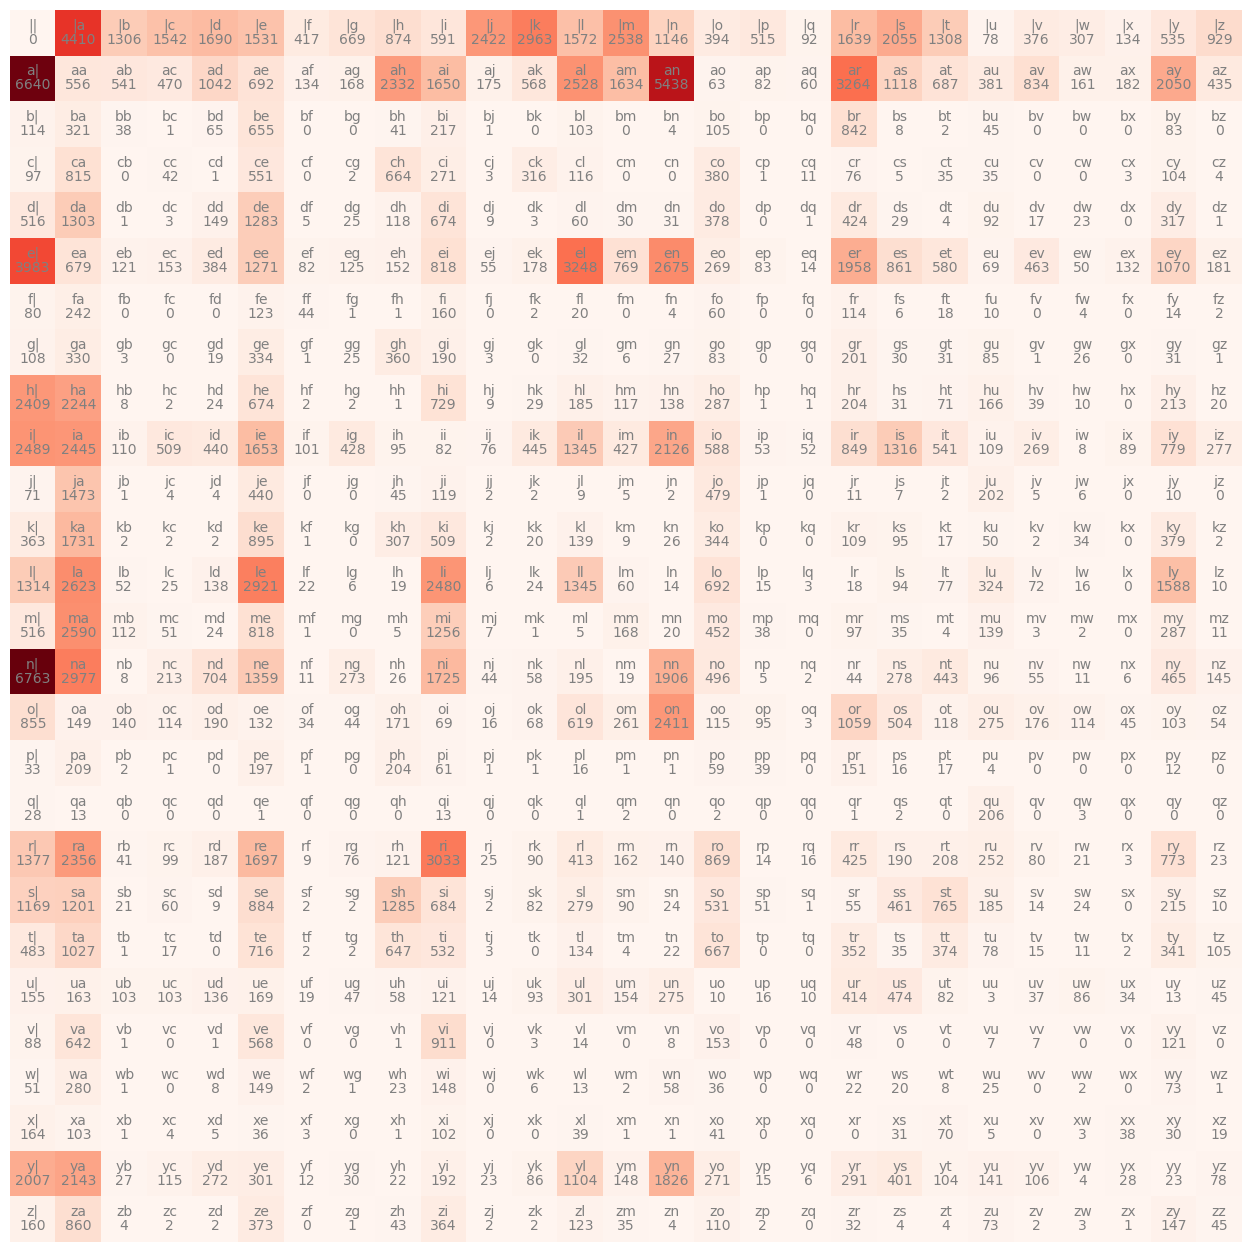

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(Count_Table, cmap='Reds')
for i in range(lib_count):
    for j in range(lib_count):
        couple = itos[i] + itos[j]
        plt.text(j, i, couple, ha="center", va="bottom", color="gray")
        plt.text(j, i, Count_Table[i,j].item(), ha="center", va="top", color="gray")
plt.axis("off")

In [21]:
Frequency_Table = Count_Table.float()
Frequency_Table /= Frequency_Table.sum(1, keepdim=True)
Frequency_Table

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

In [22]:
g = torch.Generator().manual_seed(412987498012)
torch.multinomial(Frequency_Table[0], num_samples=100, replacement=True, generator=g)

tensor([20, 23, 14, 17, 18,  4, 13,  4, 16, 18, 26, 12, 19,  7,  4,  3, 18, 18,
         1, 20,  1, 13, 20, 13, 11,  4, 26, 10,  1, 10,  8,  1,  3, 12, 13, 23,
        14,  1, 26, 12,  1, 11,  6, 13, 11,  4,  2,  4, 10, 19,  1, 15, 12, 13,
         1, 11,  4, 16, 19, 13,  4, 10,  1,  3, 22, 12,  8,  2, 13, 19, 11,  3,
         6,  4, 26,  2, 18, 19, 15, 19,  5,  4, 11, 19, 10,  1,  1, 16, 18, 26,
         1,  6, 25, 14, 10, 12, 11,  1, 18,  3])

In [23]:
max_len_of_words = max([len(w) for w in words]) + 1
lengths = torch.zeros(max_len_of_words, dtype = torch.int32)
for k, w in enumerate(words):
    lengths[len(w)] += 1

# frequency table of word lengths of data
len_frequency = lengths.float() / lengths.sum()

In [24]:
g = torch.Generator().manual_seed(412987498012)
w_lens = torch.multinomial(len_frequency, num_samples=5, replacement=True, generator=g)
for w_len in w_lens.data:

    ix = 0
    name = []
    i = w_len.item()
    while i != 0:
        prob_of_next_chat = Frequency_Table[ix]

        ix = torch.multinomial(
            prob_of_next_chat, num_samples=1, replacement=True, generator=g
            ).item()
        name.append(itos[ix])

        if ix == 0 and i - 1 != 0:
            name = []
            i = w_len.item()
        else : i -= 1

        
    print(''.join(name))

vomiilal
hoboroni
pelobr|
marinnn
kalosi|


In [25]:
# Testing the model
log_likelihood = 0.0
n = 0

for w in words:
    new_w = ["|"] + list(w) + ["|"]
    for ch1, ch2 in zip(new_w, new_w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        prob = Frequency_Table[ix1, ix2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob
        n += 1

neg_log_likelihood = -log_likelihood

print(f'{log_likelihood=}')
print(f'{neg_log_likelihood=}')
print(f'Normalized Likelihood (Loss): {neg_log_likelihood/n}')

log_likelihood=tensor(-559891.7500)
neg_log_likelihood=tensor(559891.7500)
Normalized Likelihood (Loss): 2.454094171524048
